In [12]:
# Analytics Expression Language Example
%matplotlib inline
import xarray as xr
from datetime import datetime
from datacube.api import API
from datacube.ndexpr import NDexpr

In [13]:
# Instantiating API and NDexpr

g = API()
nd = NDexpr()

In [14]:
# construct data request parameters for band_30 and band_40
data_request_descriptor = {
    'platform': 'LANDSAT_5',
    'product': 'ledaps',
    'variables': ('red', 'nir'),
    'dimensions': {
        'x': {
            'range': (79,79.1)
        },
        'y': {
            'range': (30,30.1)
        },
        'time': {
            'range': (datetime(1995, 1, 1), datetime(1995, 12, 31))
        }
    }
}

# Retrieving data from API
d1 = g.get_data(data_request_descriptor)

# construct data request parameters for PQ
pq_request_descriptor = {
    'platform': 'LANDSAT_5',
    'product': 'pqa',
    'variables': ('pixelquality'),
    'dimensions': {
        'x': {
            'range': (79,79.1)
        },
        'y': {
            'range': (30,30.1)
        },
        'time': {
            'range': (datetime(1995, 1, 1), datetime(1995, 12, 31))
        }
    }
}

# Retrieving data from API
d2 = g.get_data(pq_request_descriptor)

In [15]:
# The following 3 lines shouldn't be done like this
# Currently done like this for the sake of the example.

b30 = d1['arrays']['red']
b40 = d1['arrays']['nir']
#pq = d2['arrays']['pixelquality']

In [16]:
# NDexpr demo begins here

# perform ndvi as expressed in this language.
ndvi = nd.evaluate('((b40 - b30) / (b40 + b30))')

# perform mask on ndvi as expressed in this language.
#masked_ndvi = nd.evaluate('ndvi{(pq == 32767) | (pq == 16383) | (pq == 2457)}')

In [17]:
print(ndvi)

<xarray.DataArray (time: 1, y: 506, x: 642)>
dask.array<elemwis..., shape=(1, 506, 642), dtype=float64, chunksize=(1, 506, 642)>
Coordinates:
  * time     (time) datetime64[ns] 1995-03-18T04:22:11
  * y        (y) float64 1.159e+06 1.159e+06 1.159e+06 1.159e+06 1.159e+06 ...
  * x        (x) float64 -7.313e+06 -7.313e+06 -7.313e+06 -7.313e+06 ...


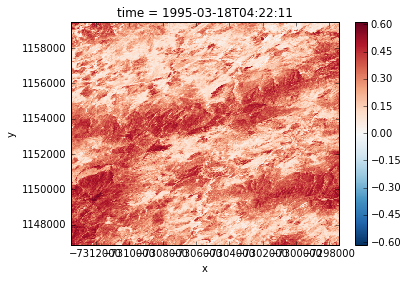

In [18]:
ndvi.plot()


In [7]:
print(masked_ndvi)

<xarray.DataArray (time: 12, y: 231, x: 420)>
dask.array<elemwis..., shape=(12, 231, 420), dtype=float64, chunksize=(1, 231, 420)>
Coordinates:
  * time     (time) datetime64[ns] 1990-03-02T23:11:16 1990-05-05T23:10:28 ...
  * y        (y) float64 -3.957e+06 -3.957e+06 -3.957e+06 -3.957e+06 ...
  * x        (x) float64 1.545e+06 1.545e+06 1.545e+06 1.545e+06 1.545e+06 ...


In [8]:
# currently dimensions are integer indices, later will be labels when
# Data Access API Interface has been finalised.

reduction_on_dim0 = nd.evaluate('median(masked_ndvi, 0)')
print(reduction_on_dim0)

<xarray.DataArray (y: 231, x: 420)>
array([[ 0.73212527,  0.73539463,  0.72473605, ...,  0.59518451,
         0.60830706,  0.58306872],
       [ 0.7266308 ,  0.73954829,  0.76156652, ...,  0.61830349,
         0.60506634,  0.60726634],
       [ 0.73212527,  0.7534574 ,  0.75202868, ...,  0.62756548,
         0.63782567,  0.62214765],
       ..., 
       [ 0.52543601,  0.5277012 ,  0.45971818, ...,  0.32512965,
         0.33821287,  0.41319136],
       [ 0.53044136,  0.54308146,  0.5111048 , ...,  0.42529602,
         0.50864267,  0.46456217],
       [ 0.55190161,  0.54160832,  0.54160832, ...,  0.54872513,
         0.55118373,  0.48095632]])
Coordinates:
  * y        (y) float64 -3.957e+06 -3.957e+06 -3.957e+06 -3.957e+06 ...
  * x        (x) float64 1.545e+06 1.545e+06 1.545e+06 1.545e+06 1.545e+06 ...


In [9]:
reduction_on_dim01 = nd.evaluate('median(masked_ndvi, 0, 1)')
print(reduction_on_dim01)

<xarray.DataArray (x: 420)>
array([ 0.64716312,  0.63130141,  0.61868247,  0.61391542,  0.60340276,
        0.59467849,  0.60356416,  0.61881766,  0.62484235,  0.62029204,
        0.62696296,  0.61071061,  0.60028249,  0.58451505,  0.58392989,
        0.59976798,  0.59895753,  0.58481675,  0.5597446 ,  0.56663276,
        0.56349213,  0.5696635 ,  0.57903731,  0.60062894,  0.59716351,
        0.60839161,  0.61572052,  0.61572945,  0.60070671,  0.62942797,
        0.63959854,  0.64738598,  0.6447136 ,  0.63424125,  0.6388767 ,
        0.6495583 ,  0.63754395,  0.62567288,  0.60625   ,  0.59943708,
        0.60211268,  0.5792613 ,  0.56115021,  0.55319901,  0.55046564,
        0.56461676,  0.58592891,  0.59024691,  0.60006317,  0.60408163,
        0.59771542,  0.59215686,  0.58400533,  0.57438273,  0.56755374,
        0.56815044,  0.57192363,  0.58173665,  0.5995    ,  0.59690031,
        0.5877974 ,  0.5800232 ,  0.57953568,  0.58183242,  0.57293002,
        0.56092699,  0.5534309 ,  0.

In [10]:
reduction_on_dim012 = nd.evaluate('median(masked_ndvi, 0, 1, 2)')
print(reduction_on_dim012)

<xarray.DataArray ()>
array(0.5337864854058376)
